# SpchLab - An Introduction

+ ###### Author: Dirk Van Compernolle   
+ ###### Modification History: 12/01/2024
+ ###### Required packages:  pyspch>=0.8
  
An example *spchlab* notebook showing structure, common  imports and commands.

Transcribing Speech - Discrepancies between spoken and written language



Speech is a continuous signal without abrupt boundaries separating successive sounds.
A transcription of speech and equally so any form of written language is a sequence of discrete symbols.
The simple fact that we can make such transcriptions suggests that 2 levels of discretization are plausible:   
- boundaries in time between two successive sounds
- categorical boundaries in an alphabet of elementary speech sounds



The mapping from a continous signal to a discrete representation is far less trivial than human intuition and seemingly peaceful coexistence of spoken and written langauge would suggest. In this matter, don't forget that you learned to listen before you were 1 yr old, learned to speak as a toddler and only learned about written language when you were six.  The listening and speaking came intuitively, the writing was hard work at school. 

## Setting up pyspch
**spchlab** is a collection of notebooks for demonstrations and exercises on speech processing and speech recognition.
**spchlab** uses the **pyspch** package.
A spchlab notebook, such as this one, may be invoked locally on your computer or in a cloud computing environmet such as Google Colab.
In any case you need spchlab to be installed such that you can do the necessary imports.

The first cell in every notebook is a check on the presence of **pyspch**.  
If it is not permanently present, uncomment the line **"! pip install git+ ... "**
and run this cell.

After that you should be able to run all the rest in the notebook.   At the end you may close the notebook.
However if you intend to come back for more exercises, just leave the notebook open to avoid having to do the installation procedure again.

**NOTE**  There is another way to solve this:  
- Instal pyspch permanently on your google drive and add your google drive to the search path for modules.
- It is a bit of work to get started, but a lot of saved time later on.

In [1]:
#
#!pip install git+https://github.com/compi1234/pyspch.git
#
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

## Doing the imports
The first real cell in any notebook will be a number of imports.   
Apart from the import of the necessary pyspch modules, you will recognize most of the others if you have done any data science in Python yet:  matplotlib for plotting,
pandas for data structures, numpy for computations, sklearn for basic machine learning tools, ...      
In the more complex notebooks with neural networks you will also see pytorch and torchaudio.

In [2]:
%matplotlib inline
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pyspch.core as Sp
import pyspch.sp as Sps
import pyspch.display as Spd

import ipywidgets as widgets
from IPython.display import display, clear_output, Audio, HTML
def box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )

## Example data

The spchlab package comes with a number of demonstration samples stored in **../data/** and which are used throughout the different labs.
spchlab comes with a **data_load()** command that recognizes common extensions for sampled data, and several forms of transcriptions and processed data. 
For sampled data files it returns *data,sampling_rate* for all other types of files it just returns *data*.

In the first cell a sample data example named "friendly.wav" is loaded and plotted.   
In the next cell a phonetic segmentation of that file is loaded into a pandas DataFrame

sampling rate= 8000


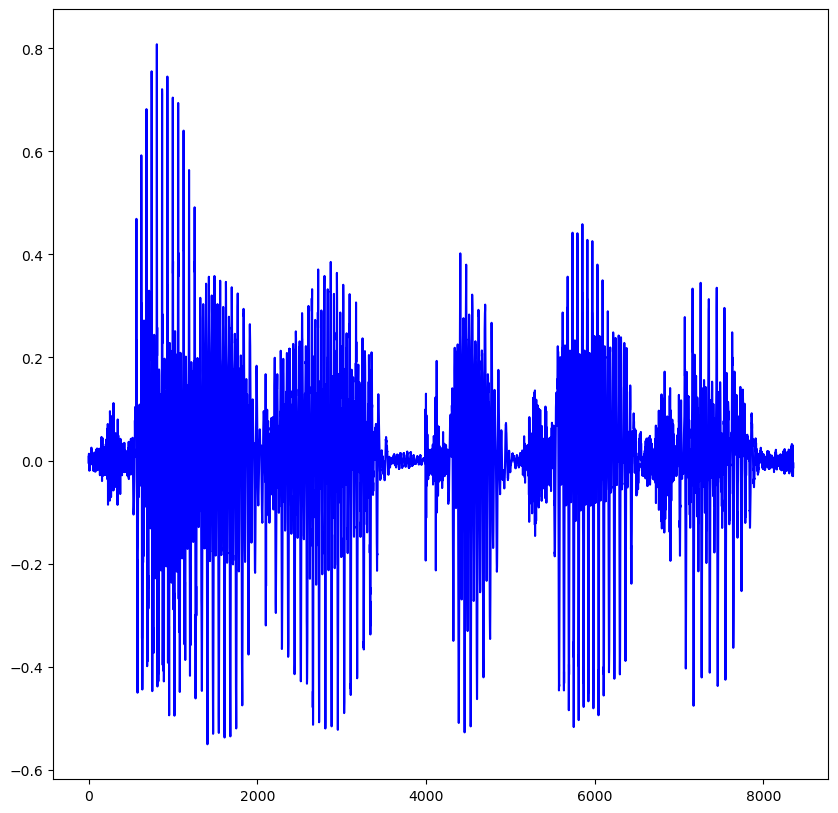

In [3]:
# when loading sampled data, both the data and the sampling rate are returned
y,sr = Sp.load_data( "demo/friendly.wav",root="../data/")  
print("sampling rate=",sr)
plt.plot(y);

In [4]:
# a segmentation is by default returned as a pandas DataFrame
seg = Sp.load_data("demo/friendly.phn",root="../data/")
seg

,t0,t1,seg
0,0.01,0.05,f
1,0.05,0.07,r
2,0.07,0.17,ih
3,0.17,0.25,n
4,0.25,0.28,d
5,0.28,0.32,l
6,0.32,0.44,iy
7,0.44,0.49,sil
8,0.49,0.52,k
9,0.52,0.61,ah


## Waveform Plots and Transcriptions

The *Spd.PlotWaveform()* routine yields a waveform plot with correctly labeled time axis and the option for overlaying the plot with a given segmentation.

A segmentation contains a collection of (start_time, end_time, symbol) typically assembled in a pandas DataFrame. 

Commonly used segmentations and file extensions are:   
- .wrd:  a word level segmentation
- .syl:  a syllabic segmentation
- .gra:  a graphemic segmentation (using letters and letter groups)
- .phn:  a phonetic segmentation

Segmentations may (or may not) contain non-speech symbols such as sil (silence), xxx( background noise), hhh (hesitation noise), ggg (garbled speech noise), ...   Note these symbols, except for silence, are not well standardized.

Observe that different levels of transcription will show greatly different levels of ambiguity.
The ambiguity for *word transcriptions* is minimal if the quality of speech is moderate or good.  On the other hand *segmentations* at the *letter of phoneme* level are highly *ambiguous*.   First of all speech is a continous signal without clear segmental boundaries, thus marking such boundaries is fuzzy business by nature.  As such you might have a **canonical** transcription (what was expected) enforced on the speech.  Or we might have a best possible transcription of what was actually spoken.  While the canonical transcription may be standaradized, the actual transcription will often be subject to great ambiguity as. different transcribers will often disagree on the exact transcription.

European languages all use some form of phonetic alphabet also for writing (thx to the Fenicians who popularized such writing system across the mediterranean and which was eventually adopted by the ancient Greek and Romans).  But because we use the same symbol set across languages with different sounds, the same symbols or groups of symbols may represent different sounds in different languages.
Other languages such as Chinese are primarily syllabic and their writing system is totally independent of the sound system.  As such identical Chinese characters, can be used in different dialects with greatly different pronunciation and even in other languages (eg. Japanese). 

Just remember the childhood game where a chain of communication is made by whispering a sentence from one person to the next.  The final recognized sentence could take any form !
 

WARNING(read_seg_file): reading/converting segmentation file ../data\demo/friendly.gra failed


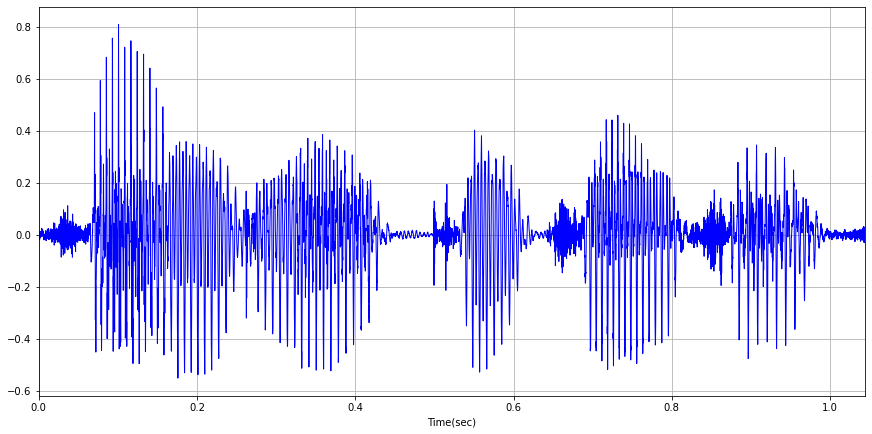

In [5]:
name = "demo/friendly"
wavdata,sr = Sp.load_data(name+".wav",root="../data")
seg = Sp.load_data(name+".gra",root="../data")
Spd.PlotWaveform(wavdata,sample_rate=sr,seg=seg)

## Example GUI
This GUI will gather all wavfiles in a given (local) directory and let you select a file via a dropdown menu.
Then it goes out to look for segmentations.  You can listen to the AUDIO as well.

In [27]:
class Signals(widgets.VBox):
    def __init__(self,dir="../data",figsize=(12,6),dpi=100):
        super().__init__()
        self.dir = dir
        self.transcript = "bla bla"
        all_files = os.listdir(self.dir)
        self.names = [os.path.splitext(fname)[0] for fname in all_files if os.path.splitext(fname)[1]==".wav"]
        self.wg_signals = widgets.Dropdown(options=self.names,value=self.names[0],description="Signal") 
        self.wg_signals.observe(self.signals_observe,'value')  
        self.wg_rate = widgets.IntText(
            value=0,
            description='Rate:',
            disabled=True   
        )
        self.wg_transcript = widgets.Text(
            value='---',
            placeholder='---',
            description='Transcript:',
            disabled=True   
        )
        self.wg_rate.layout.width = '20%'
        self.wg_transcript.layout.width='50%'
        self.signal = self.names[0]
        self.audio = widgets.Output()
        self.out = widgets.Output(layout=box_layout())
        self.UI = widgets.HBox( [self.wg_signals, self.wg_rate,self.wg_transcript],layout=box_layout())

        self.update()
        plt.close()
        self.children = [ self.UI, self.out, self.audio]
        
    def update(self):
        y,self.sample_rate = Sp.load_data(self.signal+".wav",root=self.dir)
        self.fig = Spd.PlotWaveform(y,sample_rate=self.sample_rate)
        # try to add segmentations
        segwrd = None
        transcript = None
        # first find a word segmentation
        #try:
        segwrd = Sp.load_data(self.signal+".wrd",root=self.dir,TIMIT=True)
        if segwrd is not None:
            self.fig.add_seg_plot(segwrd,iax=0,ypos=0.95,color="red",size=12,Lines=True)
            transcript = " ".join(segwrd.seg)
        
        # then add grapheme or phoneme segmentation
        seg = None
        seg = Sp.load_data(self.signal+".gra",root=self.dir,TIMIT=True)
        if seg is None:
            seg = Sp.load_data(self.signal+".phn",root=self.dir,TIMIT=True)            
        if seg is not None:
            self.fig.add_seg_plot(seg,iax=0,ypos=0.05,color="blue",size=12,Lines=True)
        if transcript is None:
            try:
                transcript = " ".join(seg.seg)
            except:
                transcript = ""
        self.wg_transcript.value = transcript 
        self.wg_rate.value = self.sample_rate
        with self.out:
            clear_output(wait=True)
            display(self.fig)
        with self.audio:
            clear_output(wait=True)
            display(Audio(data=y,rate=self.sample_rate,normalize=False,autoplay=False))
                
    def signals_observe(self,change):
        self.signal = change.new
        self.update()

In [31]:
Signals(dir="../data/demo")

WARNING(read_seg_file): reading/converting segmentation file ../data/demo\bad_bead_booed.gra failed


Signals(children=(HBox(children=(Dropdown(description='Signal', options=('bad_bead_booed', 'beed', 'b_8k', 'd1…

## Example with URL resource and spectrogram plot
This shows that the data can also be located on a remote resource.
Also segmentations can be added to both the time waveform and spectrogram plots and also additional tears.

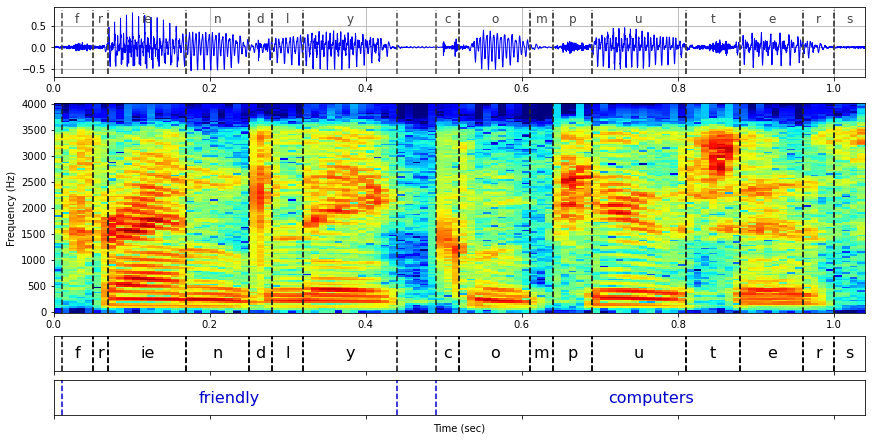

In [20]:
#segdata=[segphn,seggra,segsyl,segwrd]
dir = "https://homes.esat.kuleuven.be/~spchlab/data/"
name = "demo/friendly"

seg = Sp.load_data(name+".gra",root=dir,TIMIT=True)  
segwrd = Sp.load_data(name+".wrd",root=dir,TIMIT=True)  
wavdata, sr = Sp.load(dir+name+".wav")
shift=0.01
spg = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift)
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,segdata=[seg,segwrd],   
              sample_rate=sr,dy=None)
fig.add_seg_plot(seg,iax=0,ypos=0.85,color="#444",size=12,Lines=True)
fig.add_seg_plot(seg,iax=1,ypos=None,color="#222")
display(fig)